<a href="https://colab.research.google.com/github/j7tfj7f8k1f/Automatic-testing-tools/blob/main/YOLO_LABEL%E6%AA%94%E6%A1%88%E5%89%8D%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前置

In [ ]:
import os

os.makedirs('/content/8', exist_ok=True)
os.makedirs('/content/9', exist_ok=True)

# 統計第一列數字資料分布

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

txt_folder = "/content/8"
output_folder = "/content/9"

# 建立輸出資料夾
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
        lines = f.readlines()
    # 轉換成 DataFrame
    df = pd.DataFrame([line.split() for line in lines])

    # 將第一列的數字進行排序
    df_sorted = df.sort_values(by=df.columns[0])

    # 統計樣本分布
    sample_distribution = df_sorted[df.columns[0]].value_counts()

    # 輸出樣本分布圖
    plt.figure(figsize=(15,9))
    bars = plt.bar(sample_distribution.index, sample_distribution.values)
    plt.title('sample distribution')
    plt.xlabel('number')
    plt.ylabel('frequency')

    # 在長條上方添加樣本數量
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

    plt.savefig(os.path.join(output_folder, f'{filename}_統計表格.png'))
    plt.show()


# 統計合併在同一張圖上

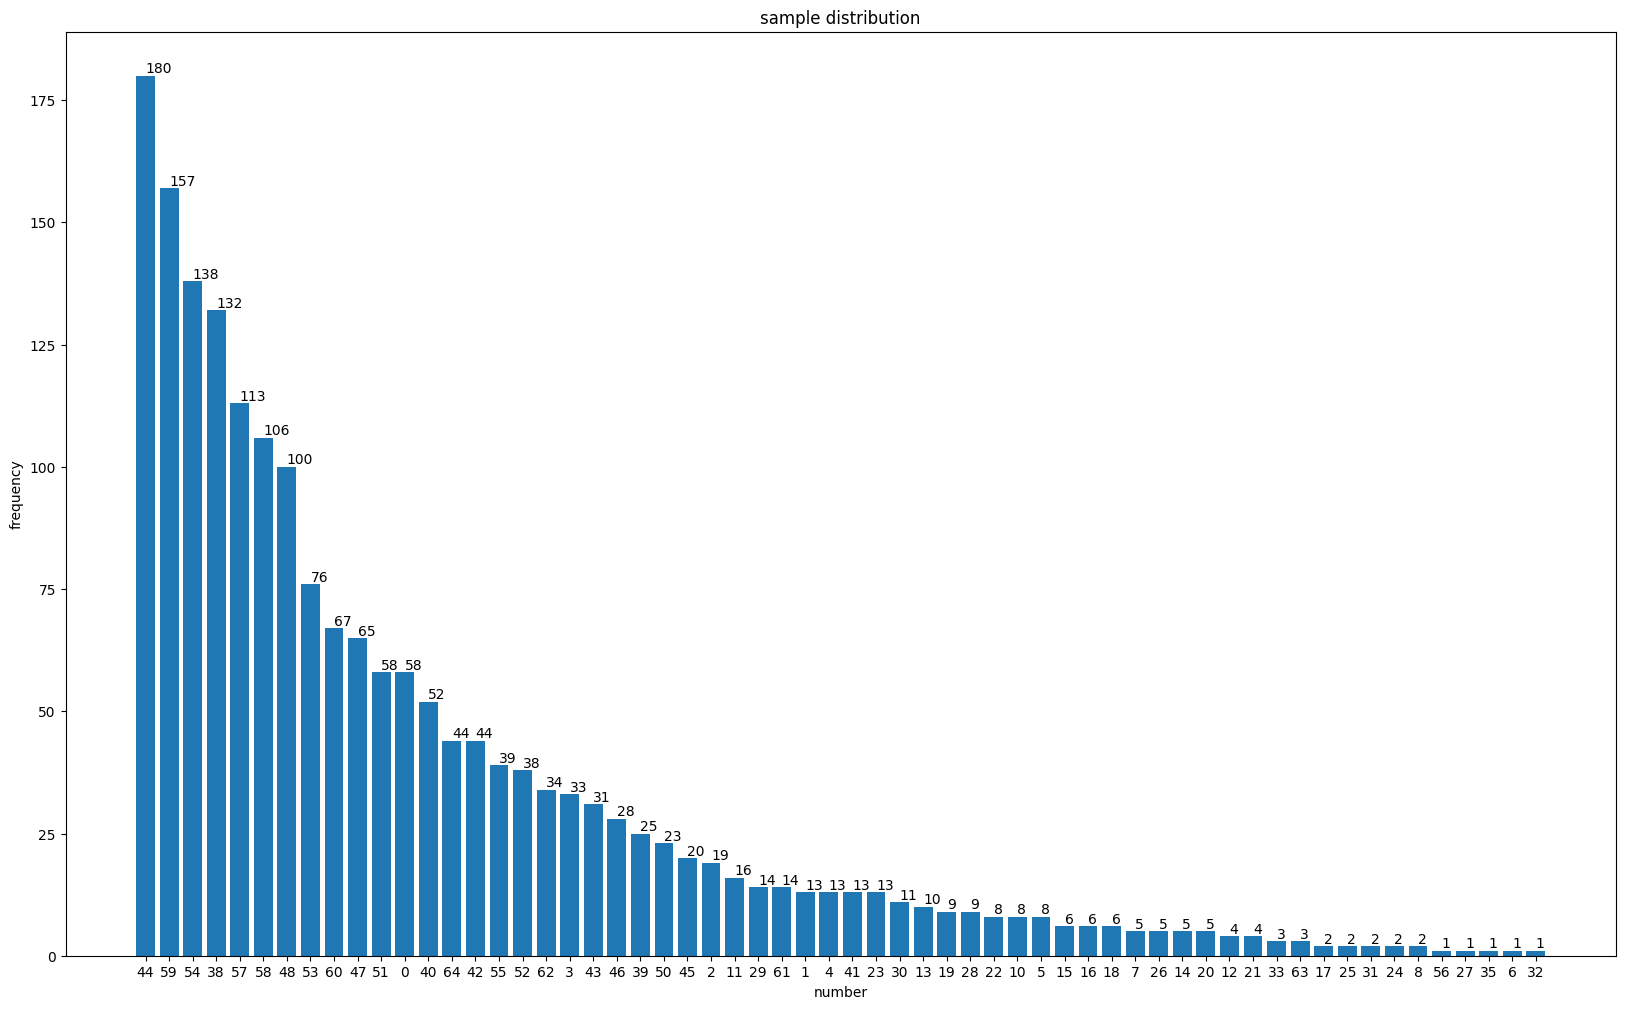

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

txt_folder = "/content/8"
output_folder = "/content/9"

# 建立輸出資料夾
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 初始化一個空的 DataFrame 來儲存所有檔案的數據
df_all = pd.DataFrame()

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
        lines = f.readlines()
    # 轉換成 DataFrame
    df = pd.DataFrame([line.split() for line in lines])
    # 將這個檔案的數據加入到總數據中
    df_all = pd.concat([df_all, df])

# 將總數據的第一列進行排序
df_sorted = df_all.sort_values(by=df_all.columns[0])

# 統計樣本分布
sample_distribution = df_sorted[df_all.columns[0]].value_counts()

# 輸出樣本分布圖
plt.figure(figsize=(20,12))
bars = plt.bar(sample_distribution.index, sample_distribution.values)
plt.title('sample distribution')
plt.xlabel('number')
plt.ylabel('frequency')

# 在長條上方添加樣本數量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.savefig(os.path.join(output_folder, '統計表格.png'))
plt.show()


# 只留第一列特定數字

In [ ]:
import os
import pandas as pd

txt_folder = "/content/8"
output_folder = "/content/9"

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
            lines = f.readlines()
    # 轉換成 DataFrame
    df = pd.DataFrame([line.split() for line in lines])

    # 預覽 DataFrame
    print(df.head())

    # 處理 DataFrame
    df = df[df[0] == "39"]

    # 轉換回 txt 檔案
    output_filename = os.path.join(output_folder, filename)
    df.to_csv(output_filename, header=False, index=False, sep=" ")

# 只砍第一列特定數字

In [ ]:
import os
import pandas as pd

txt_folder = "/content/8"
output_folder = "/content/9"

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
            lines = f.readlines()
    # 轉換成 DataFrame
    df = pd.DataFrame([line.split() for line in lines])

    # 預覽 DataFrame
    print(df.head())

    # 處理 DataFrame
    df = df[~df[0].isin(["1", "2", "3"])]

    # 轉換回 txt 檔案
    output_filename = os.path.join(output_folder, filename)
    df.to_csv(output_filename, header=False, index=False, sep=" ")


    0         1                   2        3                     4
0  23  0.800625  0.5503300330033003     0.03  0.041254125412541254
1  15   0.82875  0.5503300330033003     0.02  0.039603960396039604
2  11    0.8525  0.5503300330033003  0.02375  0.037953795379537955
3  29   0.87625  0.5503300330033003  0.02125  0.039603960396039604
4  31    0.9025  0.5503300330033003    0.025  0.041254125412541254


# 一個TXT檔案250行

In [ ]:
import os
import pandas as pd

txt_folder = "/content/8"
output_folder = "/content/9"

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
        lines = f.readlines()

    # 將每250行的數據分為一個新的DataFrame
    for i in range(0, len(lines), 250):
        df = pd.DataFrame([line.split() for line in lines[i:i+250]])

        # 預覽 DataFrame
        print(df.head())

        # 將DataFrame轉換回txt檔案並儲存到指定的資料夾
        output_filename = os.path.join(output_folder, f"{filename}_part{i//250}.txt")
        df.to_csv(output_filename, index=False, header=False, sep=" ")


    0                    1                    2                      3  \
0  29  0.08268330733229329  0.04873949579831933     0.0062402496099844   
1  44  0.08931357254290172  0.05126050420168067     0.0062402496099844   
2  44  0.14157566302652105  0.05126050420168067     0.0062402496099844   
3  44  0.09165366614664587   0.3445378151260504  0.0078003120124804995   
4  44   0.2663806552262091   0.1453781512605042     0.0062402496099844   

                      4  
0  0.020168067226890758  
1  0.015126050420168067  
2  0.015126050420168067  
3   0.01680672268907563  
4  0.015126050420168067  
    0                    1                    2                    3  \
0  46  0.11544461778471139  0.26554621848739496   0.0062402496099844   
1  46  0.45241809672386896  0.45546218487394957  0.00546021840873635   
2  46  0.48517940717628705  0.45546218487394957   0.0046801872074883   
3  46    0.608034321372855  0.45546218487394957  0.00546021840873635   
4  46  0.48205928237129486  0.424369747

# 隨機刪除一半的行

In [ ]:
import os
import pandas as pd
import numpy as np

txt_folder = "/content/8"
output_folder = "/content/9"

for filename in os.listdir(txt_folder):
    # 讀取檔案內容
    with open(os.path.join(txt_folder, filename), "r", encoding="utf-8") as f:
        lines = f.readlines()
    # 轉換成 DataFrame
    df = pd.DataFrame([line.split() for line in lines])

    # 隨機刪除一半的行
    drop_indices = np.random.choice(df.index, int(len(df)/2), replace=False)
    df = df.drop(drop_indices)

    # 預覽 DataFrame
    print(df.head())

    # 轉換回 txt 檔案
    output_filename = os.path.join(output_folder, filename)
    df.to_csv(output_filename, header=False, index=False, sep=" ")


     0         1                    2        3                     4
1    0  0.524375  0.18097281831187412    0.005  0.030042918454935622
2   17  0.091875  0.18025751072961374  0.02375  0.031473533619456366
3   35   0.39125  0.18025751072961374   0.0225  0.031473533619456366
8   33    0.1775  0.18025751072961374   0.0325  0.031473533619456366
11  22  0.413125  0.17954220314735336   0.0175  0.030042918454935622


# 壓縮特定資料夾

In [ ]:
!zip -r 9.zip 9

  adding: 9/ (stored 0%)
  adding: 9/what-to-post-on-facebook-recipes_png_jpg.rf.9ee2be1e3592dbaa1a78c1a74e22cba5.txt_part0.txt (deflated 85%)
  adding: 9/funny-facebook-status-messages-fails-9-572723a174329__605_jpg.rf.91a23835274199a8a0d5116976f21334.txt_part0.txt (deflated 89%)
  adding: 9/1346900434540240897_jpg.rf.7bf19cf34404264cf6af348f7022e174.txt_part1.txt (deflated 81%)
  adding: 9/facebook-recycle-bin-desktop_jpg.rf.ff43a09afb8913b9d31ef1cd985c3475.txt_part0.txt (deflated 86%)
  adding: 9/funny-facebook-status-messages-fails-9-572723a174329__605_jpg.rf.91a23835274199a8a0d5116976f21334.txt_part1.txt (deflated 87%)
  adding: 9/17_png_jpg.rf.152c6aa932038c42925586a4b6130bd5.txt_part0.txt (deflated 85%)
  adding: 9/facebook-recycle-bin-desktop_jpg.rf.ff43a09afb8913b9d31ef1cd985c3475.txt_part1.txt (deflated 84%)
  adding: 9/jordan-binnington_png_jpg.rf.a3d29c9251270c409b74003724b7c190.txt_part0.txt (deflated 83%)
  adding: 9/1346900434540240897_jpg.rf.7bf19cf34404264cf6af348f7022